# Oil data EDA

In [26]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta

In [46]:
# Read data
df_invest = pd.read_csv("data/oildata/oil_investing_2025.csv")
df_eia = pd.read_excel("data/oildata/oil_EIA_1987-2025_2.xls","Data 1")

In [28]:
df_invest = df_invest[["Date","Price"]]
df_invest.tail()

,Date,Price
103,01/08/2025,76.16
104,01/07/2025,77.05
105,01/06/2025,76.30
106,01/03/2025,76.51
107,01/02/2025,75.93


In [47]:
df_eia.tail()

,Back to Contents,Data 1: Europe Brent Spot Price FOB (Dollars per Barrel)
9643,2025-05-20 00:00:00,66.93
9644,2025-05-21 00:00:00,65.86
9645,2025-05-22 00:00:00,64.87
9646,2025-05-23 00:00:00,65.41
9647,2025-05-27 00:00:00,64.32


In [30]:
# Oildata preparation (invest)
df_invest.columns = ["date","price"]
df_invest["datetime"] = pd.to_datetime(df_invest["date"])
df_invest["oilprice"] = df_invest["price"].astype(float)
df_invest["month"] = df_invest["datetime"].dt.month
df_invest.drop(["price","date"],axis=1,inplace=True)

# Oildata preparation (EIA)
df_eia.columns = ["date","price"]
# Remove first two rows which include additional information
df_eia = df_eia.iloc[2:]
df_eia["datetime"] = pd.to_datetime(df_eia["date"])
df_eia["oilprice"] = df_eia["price"].astype(float)
df_eia["month"] = df_eia["datetime"].dt.month
df_eia["year"] = df_eia["datetime"].dt.year
df_eia.drop(["price","date"],axis=1,inplace=True)

(60.0, 90.0)

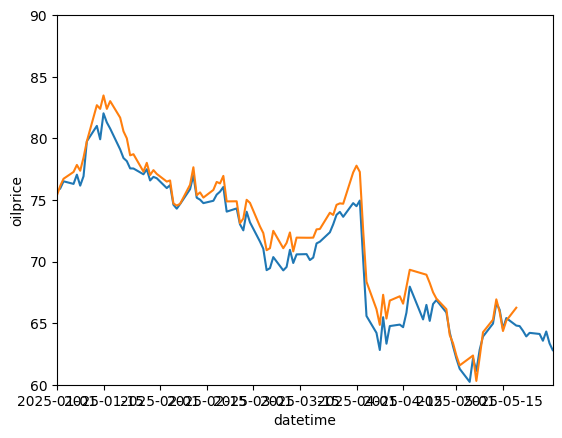

In [45]:
sns.lineplot(data=df_invest, x="datetime", y="oilprice",errorbar=None)
sns.lineplot(data=df_eia, x="datetime", y="oilprice",errorbar=None)
plt.xlim(left=pd.to_datetime("2025-01-01"))
plt.xlim(right=pd.to_datetime("2025-05-30"))
plt.ylim((60,90))

In [36]:
# Get mean of oilpricesby month
month_avg_invest = df_invest[["oilprice","month"]].groupby("month").mean()
month_avg_eia = df_eia[["oilprice","year","month"]].groupby(["year","month"]).mean().reset_index()



<Axes: xlabel='month', ylabel='oilprice'>

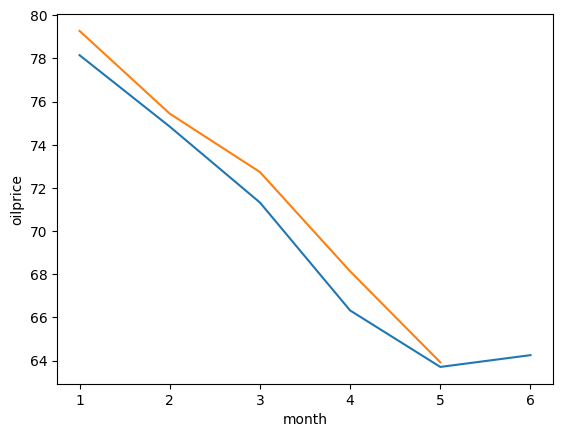

In [43]:
sns.lineplot(data=month_avg_invest, x="month", y="oilprice",errorbar=None)
sns.lineplot(data=month_avg_eia[month_avg_eia["year"]==2025], x="month", y="oilprice",errorbar=None)

In [ ]:
# It feels like the EIA data is the correct data as I find the same prices on different websites